In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf

# For loading the MNIST dataset from Keras
from tensorflow.keras.datasets import mnist

In [19]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


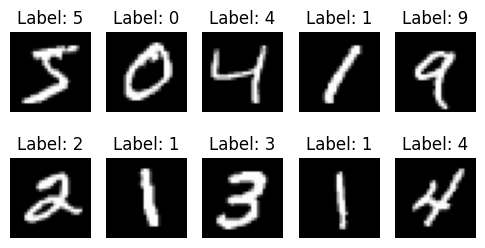

In [20]:
plt.figure(figsize=(6,3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [21]:
X_train_flat = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test_flat = X_test.reshape(X_test.shape[0], -1) / 255.0

print(f'Flattened training data shape: {X_train_flat.shape}')
print(f'Flattened test data shape: {X_test_flat.shape}')

Flattened training data shape: (60000, 784)
Flattened test data shape: (10000, 784)


In [22]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_flat, y_train, test_size=0.2, random_state=42)

print(f'Training set shape: {X_train_split.shape}')
print(f'Validation set shape: {X_val.shape}')

Training set shape: (48000, 784)
Validation set shape: (12000, 784)


# **KNN**

KNN Validation Accuracy: 0.9727
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1175
           1       0.96      1.00      0.98      1322
           2       0.98      0.97      0.97      1174
           3       0.97      0.97      0.97      1219
           4       0.97      0.97      0.97      1176
           5       0.97      0.97      0.97      1104
           6       0.99      0.99      0.99      1177
           7       0.97      0.98      0.97      1299
           8       0.99      0.94      0.96      1160
           9       0.96      0.96      0.96      1194

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



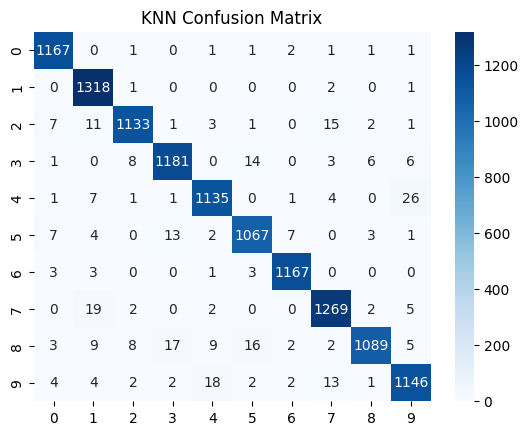

In [23]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_split, y_train_split)

y_val_pred_knn = knn_model.predict(X_val)

knn_acc = accuracy_score(y_val, y_val_pred_knn)
print(f'KNN Validation Accuracy: {knn_acc:.4f}')

print(classification_report(y_val, y_val_pred_knn))
sns.heatmap(confusion_matrix(y_val, y_val_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()

KNN Validation Accuracy: 0.9715
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1175
           1       0.95      1.00      0.97      1322
           2       0.98      0.96      0.97      1174
           3       0.96      0.97      0.97      1219
           4       0.98      0.97      0.97      1176
           5       0.96      0.97      0.97      1104
           6       0.98      0.99      0.99      1177
           7       0.97      0.97      0.97      1299
           8       0.99      0.93      0.96      1160
           9       0.96      0.96      0.96      1194

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



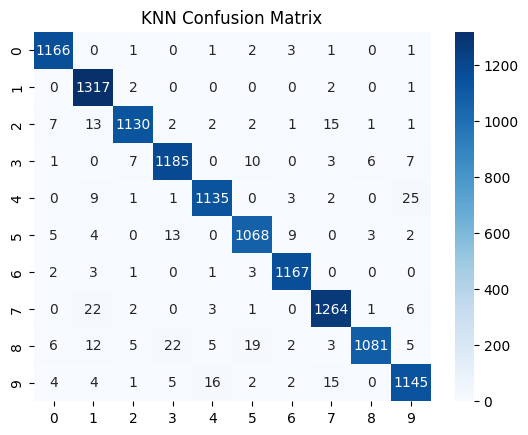

In [24]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_split, y_train_split)

y_val_pred_knn = knn_model.predict(X_val)

knn_acc = accuracy_score(y_val, y_val_pred_knn)
print(f'KNN Validation Accuracy: {knn_acc:.4f}')

print(classification_report(y_val, y_val_pred_knn))
sns.heatmap(confusion_matrix(y_val, y_val_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()

# **SVM**

SVM Validation Accuracy: 0.9352
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1175
           1       0.96      0.98      0.97      1322
           2       0.91      0.93      0.92      1174
           3       0.91      0.91      0.91      1219
           4       0.93      0.96      0.94      1176
           5       0.90      0.90      0.90      1104
           6       0.97      0.96      0.97      1177
           7       0.95      0.94      0.95      1299
           8       0.94      0.89      0.91      1160
           9       0.94      0.90      0.92      1194

    accuracy                           0.94     12000
   macro avg       0.93      0.93      0.93     12000
weighted avg       0.94      0.94      0.94     12000



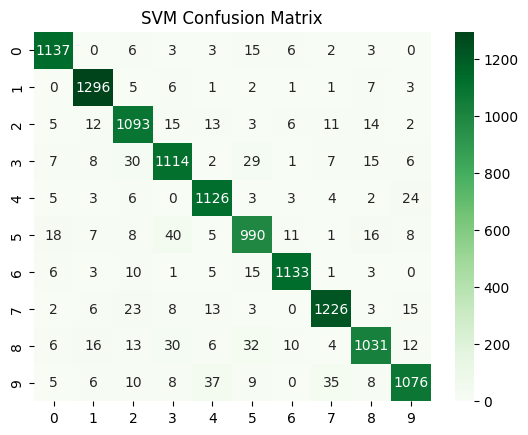

In [25]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_split, y_train_split)

y_val_pred_svm = svm_model.predict(X_val)

svm_acc = accuracy_score(y_val, y_val_pred_svm)
print(f'SVM Validation Accuracy: {svm_acc:.4f}')

print(classification_report(y_val, y_val_pred_svm))
sns.heatmap(confusion_matrix(y_val, y_val_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.show()

In [26]:
y_test_pred_svm = svm_model.predict(X_test_flat)
test_acc_svm = accuracy_score(y_test, y_test_pred_svm)
print(f'SVM Test Accuracy: {test_acc_svm:.4f}')

SVM Test Accuracy: 0.9351


SVM Validation Accuracy: 0.9776
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1175
           1       0.99      0.99      0.99      1322
           2       0.96      0.98      0.97      1174
           3       0.98      0.96      0.97      1219
           4       0.97      0.98      0.98      1176
           5       0.98      0.97      0.97      1104
           6       0.99      0.99      0.99      1177
           7       0.98      0.97      0.98      1299
           8       0.97      0.97      0.97      1160
           9       0.97      0.97      0.97      1194

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



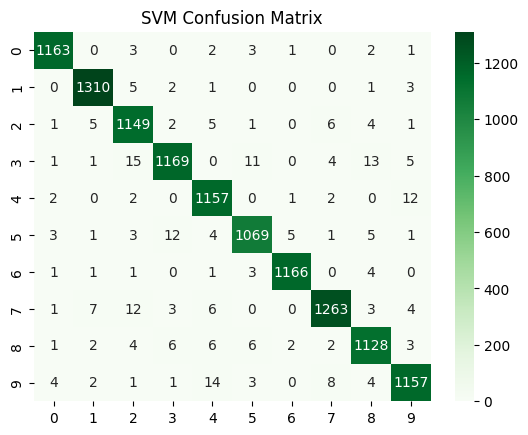

In [27]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_split, y_train_split)

y_val_pred_svm = svm_model.predict(X_val)

svm_acc = accuracy_score(y_val, y_val_pred_svm)
print(f'SVM Validation Accuracy: {svm_acc:.4f}')

print(classification_report(y_val, y_val_pred_svm))
sns.heatmap(confusion_matrix(y_val, y_val_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.show()

In [28]:
y_test_pred_svm = svm_model.predict(X_test_flat)
test_acc_svm = accuracy_score(y_test, y_test_pred_svm)
print(f'SVM Test Accuracy: {test_acc_svm:.4f}')

SVM Test Accuracy: 0.9777


SVM Validation Accuracy: 0.9767
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1175
           1       0.98      0.99      0.98      1322
           2       0.96      0.98      0.97      1174
           3       0.98      0.96      0.97      1219
           4       0.97      0.98      0.98      1176
           5       0.96      0.98      0.97      1104
           6       0.99      0.99      0.99      1177
           7       0.98      0.97      0.98      1299
           8       0.97      0.97      0.97      1160
           9       0.98      0.96      0.97      1194

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



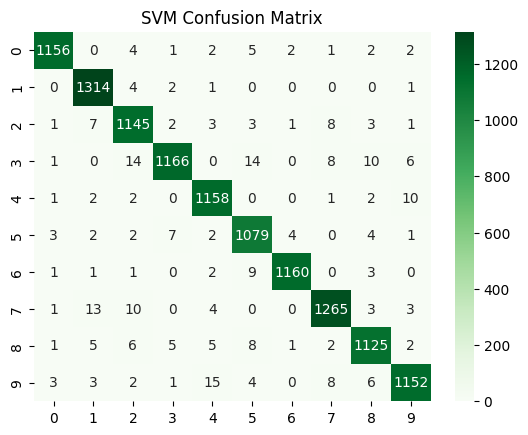

In [29]:
svm_model = SVC(kernel='poly')
svm_model.fit(X_train_split, y_train_split)

y_val_pred_svm = svm_model.predict(X_val)

svm_acc = accuracy_score(y_val, y_val_pred_svm)
print(f'SVM Validation Accuracy: {svm_acc:.4f}')

print(classification_report(y_val, y_val_pred_svm))
sns.heatmap(confusion_matrix(y_val, y_val_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.show()

In [30]:
y_test_pred_svm = svm_model.predict(X_test_flat)
test_acc_svm = accuracy_score(y_test, y_test_pred_svm)
print(f'SVM Test Accuracy: {test_acc_svm:.4f}')

SVM Test Accuracy: 0.9750


# **CNN**

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf

In [35]:
# Load data from CSV files
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [36]:
X_train = train.drop('label', axis=1).values
y_train = train['label'].values

if 'label' in test.columns:
    X_test = test.drop('label', axis=1).values
    y_test = test['label'].values
else:
    X_test = test.values
    y_test = None

In [37]:
X_train_images = X_train.reshape(-1, 28, 28)

In [38]:
# Flatten and normalize
X_train_flat = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test_flat = X_test.reshape(X_test.shape[0], -1) / 255.0

print(f'Flattened training data shape: {X_train_flat.shape}')
print(f'Flattened test data shape: {X_test_flat.shape}')

Flattened training data shape: (40725, 784)
Flattened test data shape: (28000, 784)


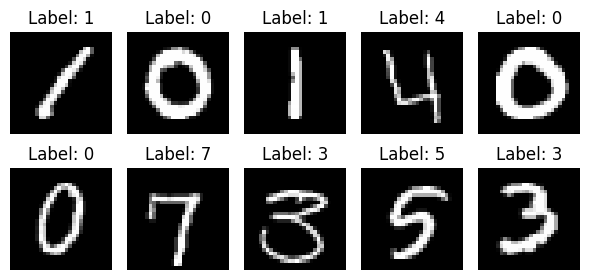

In [39]:
plt.figure(figsize=(6, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train_images[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [40]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_flat, y_train, test_size=0.2, random_state=42)

print(f'Training set shape: {X_train_split.shape}')
print(f'Validation set shape: {X_val.shape}')

Training set shape: (32580, 784)
Validation set shape: (8145, 784)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 66s 118ms/step - accuracy: 0.8207 - loss: 0.5859 - val_accuracy: 0.7380 - val_loss: 0.7963
Epoch 2/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 63s 82ms/step - accuracy: 0.9641 - loss: 0.1179 - val_accuracy: 0.9826 - val_loss: 0.0584
Epoch 3/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 44s 83ms/step - accuracy: 0.9738 - loss: 0.0830 - val_accuracy: 0.9870 - val_loss: 0.0429
Epoch 4/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 83s 86ms/step - accuracy: 0.9794 - loss: 0.0697 - val_accuracy: 0.9850 - val_loss: 0.0479
Epoch 5/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 83s 89ms/step - accuracy: 0.9806 - loss: 0.0606 - val_accuracy: 0.9864 - val_loss: 0.0428
Epoch 6/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 79s 83ms/step - accuracy: 0.9817 - loss: 0.0567 - val_accuracy: 0.9868 - val_loss: 0.0380
Epoch 7/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.9835 - loss: 0.0538 - val_accuracy: 0.9889 - val_loss: 0.0354
Epoch 8/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.9838 - loss: 0.0506 -

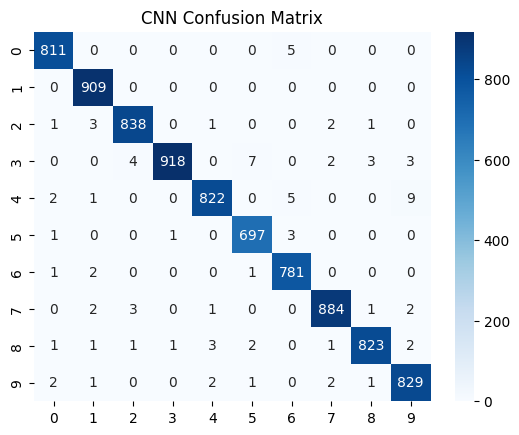

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

# Load data from CSV files
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

# Split data into features and labels
X_train = train.drop('label', axis=1).values / 255.0  # Normalize pixel values
y_train = train['label'].values

if 'label' in test.columns:
    X_test = test.drop('label', axis=1).values / 255.0  # Normalize test data
    y_test = test['label'].values
else:
    X_test = test.values / 255.0
    y_test = None

# Reshape for CNN input
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels for training
y_train = to_categorical(y_train, 10)

# Split training data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Build the CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = cnn_model.fit(
    X_train_split, y_train_split,
    validation_data=(X_val, y_val),
    epochs=10,  # You can increase epochs for better performance
    batch_size=64,
    verbose=1
)

# Evaluate the model
val_loss, val_accuracy = cnn_model.evaluate(X_val, y_val, verbose=0)
print(f'Validation Accuracy: {val_accuracy:.4f}')



# Predict on the validation set
y_val_pred = cnn_model.predict(X_val).argmax(axis=1)
y_val_true = y_val.argmax(axis=1)

# Classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_val_true, y_val_pred))

sns.heatmap(confusion_matrix(y_val_true, y_val_pred), annot=True, fmt='d', cmap='Blues')
plt.title("CNN Confusion Matrix")
plt.show()

In [45]:
print(f"y_train shape: {y_train.shape}")

y_train shape: (42000, 10)


# **SVM PCA**

**ERROR**

In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X_train, y_train, X_val, and y_val are loaded
# Flatten and normalize the data for PCA
X_train_flat = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test_flat = X_test.reshape(X_test.shape[0], -1) / 255.0

# Split the data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_flat, y_train, test_size=0.2, random_state=42)

# Apply PCA to reduce dimensions
pca = PCA(n_components=50)  # Reduce to 50 principal components
X_train_pca = pca.fit_transform(X_train_split)
X_val_pca = pca.transform(X_val_split)

print(f"Original feature dimensions: {X_train_flat.shape[1]}")
print(f"Reduced feature dimensions: {X_train_pca.shape[1]}")

# Convert one-hot encoded labels back to integer labels
y_train_split_int = y_train_split.argmax(axis=1)
y_val_split_int = y_val_split.argmax(axis=1)

# Train an SVM on the PCA-reduced data
svm_model = SVC(kernel='rbf', C=1, gamma='scale')  # RBF kernel
svm_model.fit(X_train_pca, y_train_split)

# Predict on the validation set
y_val_pred_svm = svm_model.predict(X_val_pca)

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_val_split, y_val_pred_svm)
print(f"SVM Validation Accuracy (with PCA): {svm_accuracy:.4f}")

# Classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_val_split, y_val_pred_svm))

# Confusion matrix visualization
cm = confusion_matrix(y_val_split, y_val_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix (PCA Reduced Features)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Original feature dimensions: 784
Reduced feature dimensions: 50


ValueError: y should be a 1d array, got an array of shape (33600, 10) instead.